Lipisha Chaudhary <br>


lc2919@rit.edu

# JUPYTER NOTEBOOK FOR HOMEWORK 1
## PART 1 - Sharpen a blurred colored image using a Gaussian filter

In [166]:
import numpy as np
import skimage
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import scipy.misc as sm
from scipy import signal
import scipy.ndimage as ndimage
from scipy.ndimage.filters import convolve
#import csv2


#Read and display the image to analyze
def load_img(filename):
    if os.path.isfile(os.getcwd() + '/' + filename):
        img = mpimg.imread(filename)
    return img

#Create a Gaussian filter of n x n size and width sigma
def gaussian_filter(n, sigma=1):
    n = int(n) // 2
    x, y = np.mgrid[-n:n+1, -n:n+1]
    g =  (np.exp(-((x**2 + y**2) / (2.0*sigma**2)))) / (2.0 * np.pi * sigma**2)
    #print(g)
    return g
 

#draw a circular patch on a color image Img; the patch is centered at r,c, with radius rad
#and color col (0-black; 1-red; 2-cyan; 3-green)
#Note that this function directly modifies Img. 
def draw_patch(Img, r, c, rad=7,col=1):   
    if col == 2:
        p = [0,1.0,1.0] #cyan
    else:
        p = [0,1.0,0.0] #green
    if col == 1: 
        p = [1.0,0.0,0.0]#red
    if col == 0: 
        p = [0.0,0.0,0.0]#black
        
    rr, cc = skimage.draw.circle(r, c, rad)
    Img[rr,cc, 0:3]= p       

        

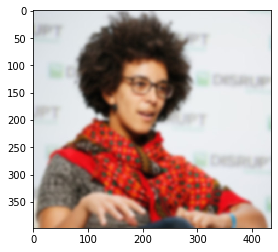

In [167]:
#1. Load your image of choice.
img = load_img('timnit_blur.jpg')
plt.imshow(img)
plt.show()

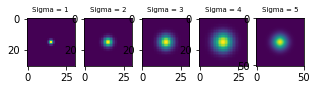

In [168]:
f = plt.figure()
#2. Create a Gaussian filter here
g_filter_1 = gaussian_filter(30, 1)
f.add_subplot(2,6, 1)
plt.imshow(g_filter_1)
plt.title("Sigma = 1", fontsize=7)
### 
g_filter_2 = gaussian_filter(30, 2)
f.add_subplot(2,6, 2)
plt.imshow(g_filter_2)
plt.title("Sigma = 2", fontsize=7)

g_filter_3 = gaussian_filter(30, 3)
f.add_subplot(2,6, 3)
plt.imshow(g_filter_3)
plt.title("Sigma = 3", fontsize=7)

g_filter_4 = gaussian_filter(30, 4)
f.add_subplot(2,6, 4)
plt.imshow(g_filter_4)
plt.title("Sigma = 4", fontsize=7)

g_filter_5 = gaussian_filter(50, 5)
f.add_subplot(2,6, 5)
plt.imshow(g_filter_5)
plt.title("Sigma = 5", fontsize=7)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


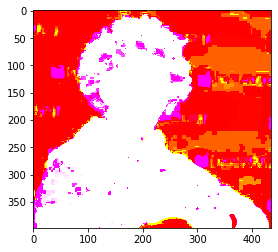

In [169]:
#3. Next, convert your image to L.a.b. color scale
lab = skimage.color.rgb2lab(img)
plt.imshow(lab)
plt.show(block=True)

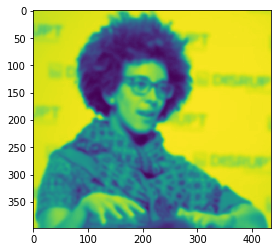

In [170]:
#4. Extract the first channel to get the intensity-only image. Say this results in L
'****Put your code here.'
L = lab[:,:,0]
plt.imshow(L)
plt.show(block=True)

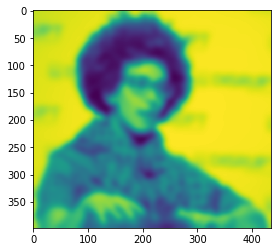

In [171]:
#5. Convolve this new image L with the filter g to get a smoothed image Simg
'****Put your code here.'
Simg = ndimage.convolve(L, g_filter_5)
plt.imshow(Simg)
plt.show(block=True)

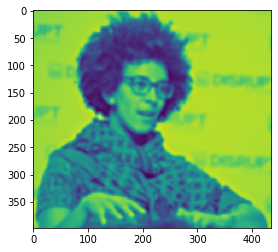

In [172]:
#6. Create a new image by multiplying L by a small constant r and Simg by another small constant s
newL = 5*L - 2*Simg
plt.imshow(newL)
plt.show(block=True)

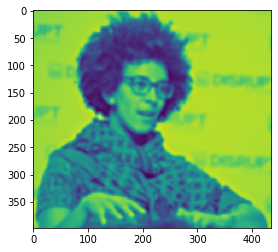

In [173]:
#7. Normalize your new image so that its values are between 0 and 100
'****Put your code here.'
norm_l = 100 * ((newL - newL.min())/(newL.max()-newL.min()))
plt.imshow(norm_l)
plt.show(block=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


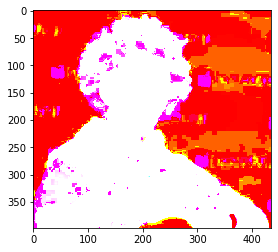

In [174]:
#8. Recombine this new L image with the previous a and b channels of the lab image in step #3.
'****Put your code here.'
lab[:,:,0] = norm_l
plt.imshow(lab)
plt.show(block=True)

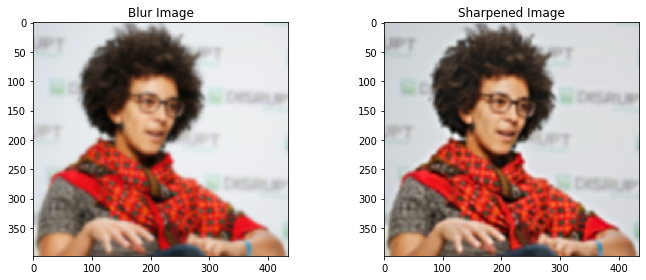

In [175]:

#9. Reconvert the L.a.b. image back to RGB with the command below (assuming the new L.a.b. image is called lab2)
img2 = skimage.color.lab2rgb(lab)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title("Blur Image")
ax[1].imshow(img2)
ax[1].set_title("Sharpened Image")
plt.savefig('Final_Result.jpg')
fig.tight_layout()
plt.show()


## Conclusion
#### Examine your newly sharpened image and save it to file. Also display the original and sharpened image side-by-side <br>




The task was to convert a blur image to a sharpened one. We start Setting the Gaussian filter to a lesser number for example, 1 or 2; doesn't smoothened the image as much as filter applied with 5. Even with changing the values of constants r & s, there is a change when we keep the difference of r & s to minimum and r > s. <br>
Although changing these values there wasn't an immense change in the blurred image, but we can also see that the image has been sharpened to some extent.

# PART 2 - Implement Template Matching (Find Waldo)
Run the three different template matching algorithms discussed in class
1. cross-correlatios; 2. normalized cross-correlations and 3. sum-of-squared differences (SSD).
1. Convert the image to grayscale using rgb2gray
2. Write a function correlate to generate a correlation map
3. Find the location of the max point (is this Waldo?)
4. Next, implement NCC and SSD to determine if they find Waldo
5. Display your 3 resulting maps and location of max, max, min

In [176]:
#1. Load the image and Waldo template

img1 = load_img('waldo_onIce.png')
temp1 = load_img('waldo_template.png')

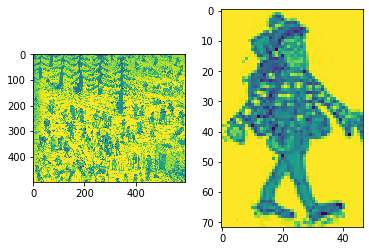

In [177]:
#Convert the two images to grayscale
fig = plt.figure()
img = skimage.color.rgb2gray(img1)
fig.add_subplot(1, 2, 1)
plt.imshow(img)
temp = skimage.color.rgb2gray(temp1)
fig.add_subplot(1, 2, 2)
plt.imshow(temp)
plt.show()

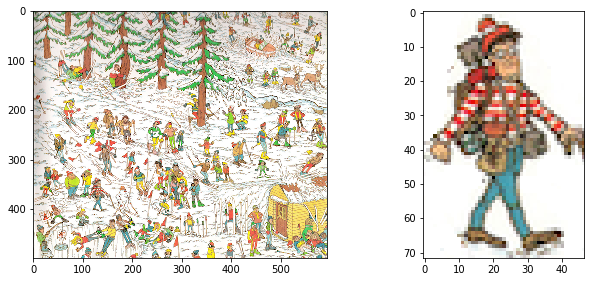

In [178]:
#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(temp1)
fig.tight_layout()
plt.show()

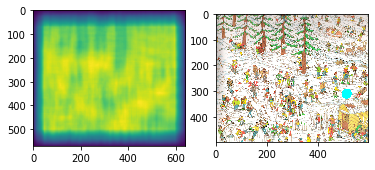

In [179]:
#2. Write and call a cross-correlation function to find the best match for Waldo
def crosscorr(Img, f):
    '****Put your code here.'
    corr = signal.correlate2d(Img, f)
    return corr

result_image = crosscorr(img,temp)
max_val=np.where(result_image == np.amax(result_image))

(tempx,tempy)= temp.shape

max_x = max_val[0][0]-math.floor(tempx/2)
max_y = max_val[1][0]-math.floor(tempy/2)


#3. Use the helper function 'draw_patch' to place a circular cyan patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the correlation map obtained alongside the image. 
'****Put your code here.'
draw_patch(img1, max_x, max_y, rad=20,col=2)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(result_image)
fig.add_subplot(1, 2, 2)
plt.imshow(img1)
plt.show()


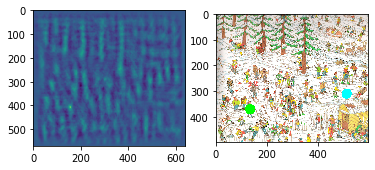

In [180]:
#4. Write and call a normalized cross-correlation function to find the best match for Waldo
def normcrosscorr(Img, f):
    '****Put your code here.'
    img_norm = (Img - np.mean(Img)) / (np.std(Img) * len(Img))
    f_norm = (f - np.mean(f)) / (np.std(f))
    corr = signal.correlate2d(img_norm, f_norm)
    return corr

norm_result_image = normcrosscorr(img,temp)
norm_max_val=np.where(norm_result_image == np.max(norm_result_image))

(tempx,tempy)= temp.shape

norm_max_x = norm_max_val[0][0]-math.floor(tempx/2)
norm_max_y = norm_max_val[1][0]-math.floor(tempy/2)


#5. Again, use the helper function 'draw_patch' to place a circular green patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the normalized correlation map obtained alongside the image. 
# 
'****Put your code here.'
draw_patch(img1, norm_max_x, norm_max_y, rad=20,col=3)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(norm_result_image)
fig.add_subplot(1, 2, 2)
plt.imshow(img1)
plt.show()

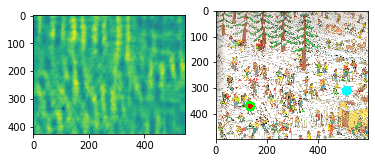

In [181]:
#6. Write and call an SSD function to find the best match for Waldo
import math
def SSD(Img, f):
    '****Put your code here.'
    Z = np.sum((Img - f)**2)
    return Z

(imgx,imgy)= img.shape
(tempx,tempy)= temp.shape

ssd_mat=np.zeros((imgx-tempx,imgy-tempy))
x=0
while(x<(imgx-tempx)):
    y=0
    while(y<(imgy-tempy)):
        img_slice=img[x:x+tempx,y:y+tempy]
        ssd_mat[x][y]=SSD(img_slice,temp)
        y+=1
    x+=1

min_val=np.where(ssd_mat == np.amin(ssd_mat))

ssd_min_x = min_val[0][0]+math.floor(tempx/2)
ssd_min_y = min_val[1][0]+math.floor(tempy/2)

#7. Lastly, use the helper function 'draw_patch' to place a circular red patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the SSD map obtained alongside the image. 
# 
'****Put your code here.'
draw_patch(img1, ssd_min_x, ssd_min_y, rad=10,col=1)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(ssd_mat)
fig.add_subplot(1, 2, 2)
plt.imshow(img1)
plt.show()

### Template Matching Results <br>


The template matching while doing the cross-correlation although it shows the similarity in two images, the results do not particularly point our the perfect location of Waldo. Furthermore normalizing the image array gets the accurate position og waldo in the actual image, this can be due to the fact that we change the range of the intensity pixels and get them more closer of them to be compact. The SSD gives similar results as normalizing the image, this method takes the differnce between the distance of the mid points of the image and template, since our template shape is very less than the actual image we slice the image and then compute the SSD of them. We then find the least distance between the template and the image slicing, this shows the most matching numbers as lesser the difference more match it gives.

## Part 3: Canny Edge Detection <br>
- **Yes** <br>


The task was to read and understand the canny edge detection. The link provided a detailed information about how a canny edge detector works, the steps involved into it and the mathematical formulation of how to get the gaussian filter used to smoothened out the edges. The article also discusses about various method on how an edge can be detected.